[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%206/6.5_Q_P_rl_CartPole.ipynb)

In [ ]:
# Colab에서 Render를 그림파일로 해주기 위한 설정
!apt update
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

# 필요한 모듈 설치
import tensorflow as tf
import gym
from IPython import display
import cv2
from pyvirtualdisplay import Display
from IPython import display
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import random
from google.colab.patches import cv2_imshow
%matplotlib inline
Display().start()


# 동영상으로 저장하기 위한 이미지 를 그려주는 함수를 정의하자
def draw_state(img, q_val):
    img_r = img.copy()
    cv2.putText(img_r, 'L', (20, 50), 
                cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    cv2.putText(img_r, 'R', (530, 50), 
                cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0))
    cv2.putText(img_r, str(round(q_val[0], 3)), (10, 70), 
                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    cv2.putText(img_r, str(round(q_val[1], 3)), (520, 70), 
                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    return img_r


# 문자열을 이미지로 그려주는 함수를 정의하자
def draw_txt(txt):
    img = np.zeros((400, 600, 3))
    cv2.putText(img, txt, (10, 200), 
                cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255))
    return img

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
# 상태(4가지값)를 입력 받으면, 각 액션(2가지)의 Q값을 돌려주는 신경망을 모델링하자

state_num = (4,)
action_num = 2
hidden_state = 128
learning_rate = 0.001 

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_state,
                                input_shape=state_num,
                                activation='relu'))
model.add(tf.keras.layers.Dense(action_num))
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 898
Trainable params: 898
Non-trainable params: 0
_________________________________________________________________


현재 에프소드 : 0, 현재 점수 : 10.0, 현재 입실론 : 89.21
현재 에프소드 : 1, 현재 점수 : 17.0, 현재 입실론 : 88.43
현재 에프소드 : 2, 현재 점수 : 23.0, 현재 입실론 : 87.66
현재 에프소드 : 3, 현재 점수 : 18.0, 현재 입실론 : 86.89
현재 에프소드 : 4, 현재 점수 : 24.0, 현재 입실론 : 86.13
현재 에프소드 : 5, 현재 점수 : 11.0, 현재 입실론 : 85.38
현재 에프소드 : 6, 현재 점수 : 13.0, 현재 입실론 : 84.63
현재 에프소드 : 7, 현재 점수 : 24.0, 현재 입실론 : 83.89
현재 에프소드 : 8, 현재 점수 : 30.0, 현재 입실론 : 83.16
현재 에프소드 : 9, 현재 점수 : 15.0, 현재 입실론 : 82.43
현재 에프소드 : 10, 현재 점수 : 16.0, 현재 입실론 : 81.71
현재 에프소드 : 11, 현재 점수 : 17.0, 현재 입실론 : 80.99
현재 에프소드 : 12, 현재 점수 : 11.0, 현재 입실론 : 80.28
현재 에프소드 : 13, 현재 점수 : 17.0, 현재 입실론 : 79.58
현재 에프소드 : 14, 현재 점수 : 14.0, 현재 입실론 : 78.88
현재 에프소드 : 15, 현재 점수 : 18.0, 현재 입실론 : 78.19
현재 에프소드 : 16, 현재 점수 : 14.0, 현재 입실론 : 77.51
현재 에프소드 : 17, 현재 점수 : 15.0, 현재 입실론 : 76.83
현재 에프소드 : 18, 현재 점수 : 19.0, 현재 입실론 : 76.16
현재 에프소드 : 19, 현재 점수 : 14.0, 현재 입실론 : 75.49
현재 에프소드 : 20, 현재 점수 : 14.0, 현재 입실론 : 74.83
현재 에프소드 : 21, 현재 점수 : 11.0, 현재 입실론 : 74.18
현재 에프소드 : 22, 현재 점수 : 17.0, 현재 입실론 : 73.53
현재 에프소드 : 23, 현재 점수 :

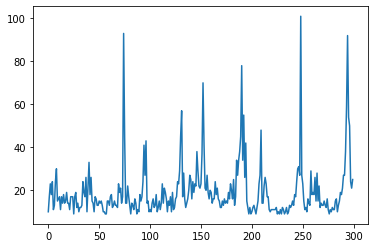

In [ ]:
# 파라미터들을 설정해 주자
num_episode = 300
is_video_save = False
fps = 10.0
avi_file_name = 'Q-rl-7.avi'

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 250

discount_rate = 0.99

# 환경을 만들어 주자
env = gym.make('CartPole-v1')

# 랜덤하게 움직일 값(입실론)을 정의해 주자
epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (600, 400))

reward_list = []

# 정해진 에피소드만큼 학습한다.
for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    s = np.reshape(s, [1, 4])

    while not d:
        # 현재 상태의 Q값을 구한다.
        q_val = model.predict(s)
        if (is_video_save):
            out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))

        # 특정값(입실론)을 기준으로 랜덤하게 움직인다.
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_val[0])
        n_s, r, d, _ = env.step(action)
        total_reward = total_reward+r
        n_s = np.reshape(n_s, [1, 4])

        # Q(s,a) = r + discount_rate * max(Q(s'))
        # 위 수식을 그대로 구현해 준다.
        target_q_val = r+discount_rate*np.max(model.predict(n_s)[0])

        if d:
            q_val[0][action] = r
        else:
            q_val[0][action] = target_q_val

        # 심경망을 학습한다.
        model.train_on_batch(np.array(s), np.array(q_val))
        s = n_s

        if (total_reward >= 300):
            d = True

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay

    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))
        txt = 'Result : '+str(total_reward)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    print('현재 에프소드 : {}, 현재 점수 : {}, 현재 입실론 : {}'.format(epi, 
                                                         total_reward, 
                                                         round(epsilon*100, 2)))

plt.plot(reward_list)
plt.savefig('plot.jpg')
if (is_video_save):
    txt = 'Total Score : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    reward_list_img = cv2.imread('plot.jpg')
    reward_list_img = cv2.resize(reward_list_img, (600, 400))
    for _ in range(10):
        out.write(np.uint8(reward_list_img))
    out.release()

In [ ]:
# 모델을 새로 정의하자
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_state, 
                                input_shape=state_num, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(action_num))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))

# 파라미터들을 설정해 주자
num_episode = 300
is_video_save = False
fps = 10.0
avi_file_name = 'Q-rl-8.avi'

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 250

discount_rate = 0.99

# 환경을 만들어 주자
env = gym.make('CartPole-v1')

# 랜덤하게 움직일 값(입실론)을 정의해 주자
epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

# 상태와 액션 그리고 리워드와 다음 상태를 저장할 리스트를 만든다
memory_size = 2000
memory = deque(maxlen=memory_size)
# 기록을 저장해 두었다가 한번에 학습할 량을 정한다
batch_size = 64

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (600, 400))

reward_list = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    s = np.reshape(s, [1, 4])

    while not d:
        q_val = model.predict(s)
        if (is_video_save):
            out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_val[0])
        n_s, r, d, _ = env.step(action)
        n_s = np.reshape(n_s, [1, 4])
        # 상태/액션/보상/다음상태 를 저장한다.
        i = (s, action, r/100., n_s, d)
        memory.append(i)
        s = n_s
        total_reward = total_reward+r

        if (total_reward >= 300):
            d = True
    # 버퍼에 기록이 일정 이상 쌓이면 학습을 시작한다.
    if len(memory) >= batch_size*2:
        # 버퍼의 기록 중 batch size 만큼 가져와서 학습을 진행한다.
        sample = random.sample(memory, batch_size)
        state_batch = []
        q_val_batch = []
        for _s, _a, _r, _n_s, _d in sample:
            q_val = model.predict(_s)
            target_q_val = _r+discount_rate*np.max(model.predict(_n_s)[0])
            if _d:
                q_val[0][_a] = _r
            else:
                q_val[0][_a] = target_q_val
            state_batch.append(_s[0])
            q_val_batch.append(q_val[0])
        model.train_on_batch(np.array(state_batch), np.array(q_val_batch))

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay
    reward_list.append(total_reward)
    if (is_video_save):
        out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))
        txt = 'Result : '+str(total_reward)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    print('현재 에프소드 : {}, 현재 점수 : {}, 현재 입실론 : {}'.format(epi, 
                                                         total_reward, 
                                                         round(epsilon*100, 2)))

plt.plot(reward_list)
plt.savefig('plot.jpg')
if (is_video_save):
    txt = 'Total Score : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    reward_list_img = cv2.imread('plot.jpg')
    reward_list_img = cv2.resize(reward_list_img, (600, 400))
    for _ in range(10):
        out.write(np.uint8(reward_list_img))
    out.release()

현재 에프소드 : 0, 현재 점수 : 12.0, 현재 입실론 : 89.21
현재 에프소드 : 1, 현재 점수 : 13.0, 현재 입실론 : 88.43
현재 에프소드 : 2, 현재 점수 : 26.0, 현재 입실론 : 87.66
현재 에프소드 : 3, 현재 점수 : 35.0, 현재 입실론 : 86.89
현재 에프소드 : 4, 현재 점수 : 31.0, 현재 입실론 : 86.13
현재 에프소드 : 5, 현재 점수 : 23.0, 현재 입실론 : 85.38
현재 에프소드 : 6, 현재 점수 : 30.0, 현재 입실론 : 84.63
현재 에프소드 : 7, 현재 점수 : 14.0, 현재 입실론 : 83.89
현재 에프소드 : 8, 현재 점수 : 32.0, 현재 입실론 : 83.16
현재 에프소드 : 9, 현재 점수 : 12.0, 현재 입실론 : 82.43
현재 에프소드 : 10, 현재 점수 : 23.0, 현재 입실론 : 81.71
현재 에프소드 : 11, 현재 점수 : 12.0, 현재 입실론 : 80.99
현재 에프소드 : 12, 현재 점수 : 14.0, 현재 입실론 : 80.28
현재 에프소드 : 13, 현재 점수 : 14.0, 현재 입실론 : 79.58
현재 에프소드 : 14, 현재 점수 : 14.0, 현재 입실론 : 78.88
현재 에프소드 : 15, 현재 점수 : 11.0, 현재 입실론 : 78.19
현재 에프소드 : 16, 현재 점수 : 14.0, 현재 입실론 : 77.51
현재 에프소드 : 17, 현재 점수 : 10.0, 현재 입실론 : 76.83
현재 에프소드 : 18, 현재 점수 : 13.0, 현재 입실론 : 76.16
현재 에프소드 : 19, 현재 점수 : 22.0, 현재 입실론 : 75.49
현재 에프소드 : 20, 현재 점수 : 10.0, 현재 입실론 : 74.83
현재 에프소드 : 21, 현재 점수 : 22.0, 현재 입실론 : 74.18
현재 에프소드 : 22, 현재 점수 : 19.0, 현재 입실론 : 73.53
현재 에프소드 : 23, 현재 점수 :

In [ ]:
# 모델을 새로 정의하자
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_state, 
                                input_shape=state_num, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(action_num))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate))

# 타겟 모델을 정의해 준다.
target_model = tf.keras.models.clone_model(model)

# 파라미터들을 설정해 주자
num_episode = 300
is_video_save = False
fps = 10.0
avi_file_name = 'Q-rl-9.avi'

epsilon_max = 0.9
epsilon_min = 0.1
epsilon_count = 250

discount_rate = 0.99

# 환경을 만들어 주자
env = gym.make('CartPole-v1')

# 랜덤하게 움직일 값(입실론)을 정의해 주자
epsilon = epsilon_max
epsilon_decay = epsilon_min/epsilon_max
epsilon_decay = epsilon_decay**(1./float(epsilon_count))

# 상태와 액션 그리고 리워드와 다음 상태를 저장할 리스트를 만든다
memory_size = 2000
memory = deque(maxlen=memory_size)
# 기록을 저장해 두었다가 한번에 학습할 량을 정한다
batch_size = 64
# 타겟을 몇번 에피소드마다 업데이트 할 지 정한다.
target_update_count = 30

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (600, 400))

reward_list = []

train_count = 1
for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    s = np.reshape(s, [1, 4])
    reward_sum = 0
    while not d:
        q_val = model.predict(s)
        if (is_video_save):
            out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))
        if (np.random.rand()) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_val[0])
        n_s, r, d, _ = env.step(action)
        n_s = np.reshape(n_s, [1, 4])
        i = (s, action, r/100., n_s, d)
        memory.append(i)
        s = n_s
        total_reward = total_reward+r
        if (total_reward >= 300):
            d = True
    if len(memory) >= batch_size*2:
        sample = random.sample(memory, batch_size)
        state_batch = []
        q_val_batch = []
        for _s, _a, _r, _n_s, _d in sample:
            q_val = model.predict(_s)
            # Q값을 업데이트할때 model을 사용하지 않고, target_model을 사용한다.
            target_q_val = _r+discount_rate*np.max(target_model.predict(_n_s)[0])
            if _d:
                q_val[0][_a] = _r
            else:
                q_val[0][_a] = target_q_val
            state_batch.append(_s[0])
            q_val_batch.append(q_val[0])
        model.train_on_batch(np.array(state_batch), np.array(q_val_batch))
        train_count = train_count+1

    # 학습이 일정횟수 지나면 타겟의 가중치를 모델의 가중치로 업데이트해준다.
    if train_count%target_update_count == 0:
        target_model.set_weights(model.get_weights())
        print('Target Updated')
        if (is_video_save):
            txt = 'Target Updated'
            for _ in range(3):
                out.write(np.uint8(draw_txt(txt)))

    if (epsilon > epsilon_min):
        epsilon = epsilon*epsilon_decay
    reward_list.append(total_reward)

    if (is_video_save):
        out.write(np.uint8(draw_state(env.render('rgb_array'), q_val[0])))
        txt = 'Result : '+str(total_reward)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    print('현재 에프소드 : {}, 현재 점수 : {}, 현재 입실론 : {}'.format(epi, 
                                                         total_reward, 
                                                         round(epsilon*100, 2)))

plt.plot(reward_list)
plt.savefig('plot.jpg')
if (is_video_save):
    txt = 'Total Score : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    reward_list_img = cv2.imread('plot.jpg')
    reward_list_img = cv2.resize(reward_list_img, (600, 400))
    for _ in range(10):
        out.write(np.uint8(reward_list_img))
    out.release()

In [ ]:
# 상태(4가지값)를 입력 받으면, 각 액션(2가지)의 Q값을 돌려주는 신경망을 모델링하자
# 마지막 출략층은 확률값이 나와야 하므로 softmax를 사용하자

state_num = (4,)
action_num = 2
hidden_state = 128
learning_rate = 0.001

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_state, 
                                input_shape=state_num, 
                                activation='relu'))
model.add(tf.keras.layers.Dense(action_num, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate)
model.summary()

# 파라미터들을 설정해 주자
num_episode = 300
is_video_save = False
fps = 10.0
avi_file_name = 'P-rl-7.avi'

discount_rate = 0.99

# 환경을 만들어 주자
env = gym.make('CartPole-v1')

if (is_video_save):
    fcc = cv2.VideoWriter_fourcc(*'DIVX')
    out = cv2.VideoWriter(avi_file_name, fcc, fps, (600, 400))

reward_list = []

for epi in range(num_episode):
    if (is_video_save):
        txt = 'Episode : '+str(epi)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    d = False
    total_reward = 0
    s = env.reset()
    s = np.reshape(s, [1, 4])
    memory = []
    while not d:
        p = model.predict(s)[0]
        if (is_video_save):
            out.write(np.uint8(draw_state(env.render('rgb_array'), p)))
        action = np.random.choice(range(2), p=p)
        n_s, r, d, _ = env.step(action)
        n_s = np.reshape(n_s, [1, 4])
        i = (s, action, r/100., n_s, d)
        memory.append(i)
        s = n_s
        total_reward = total_reward+r
        if (total_reward >= 300):
            d = True
    r_sum = 0
    for _s, _a, _r, _n_s, _d in memory[::-1]:
        r_sum = _r+discount_rate*r_sum
        variable = model.trainable_variables
        with tf.GradientTape() as tape:
            p = model(_s)[0][_a]
            # -log(p)의 미분은 -1/p가 되어 이전 식과 같아진다.
            loss = -tf.math.log(p)*r_sum
        grad = tape.gradient(loss, variable)
        opt.apply_gradients(zip(grad, variable))

    reward_list.append(total_reward)

    if (is_video_save):
        txt = 'Result : '+str(total_reward)
        for _ in range(3):
            out.write(np.uint8(draw_txt(txt)))
    print('현재 에프소드 : {}, 현재 점수 : {}'.format(epi, total_reward))

plt.plot(reward_list)
plt.savefig('plot.jpg')
if (is_video_save):
    txt = 'Total Score : '+str(np.sum(reward_list))
    for _ in range(3):
        out.write(np.uint8(draw_txt(txt)))
    reward_list_img = cv2.imread('plot.jpg')
    reward_list_img = cv2.resize(reward_list_img, (600, 400))
    for _ in range(10):
        out.write(np.uint8(reward_list_img))
    out.release()